Versión con bucles y medias corregidas.

In [1322]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

Archivos entropy (siempre split)

In [1323]:
from pathlib import Path
path = Path('../data_inputs')

In [1324]:
def delete(special_vals):
    return 1 if special_vals == 1 else 0

Cada dataframe de cada combinación tiene una columna que indica si el split es special value o no

In [1325]:
ficheros = ['entropy-nofilter', 'entropy-shuffle', 'entropy-bitshuffle', 
                'blosclz-nofilter-split', 'blosclz-shuffle-split', 'blosclz-bitshuffle-split', 
                'lz4-nofilter-split', 'lz4-shuffle-split', 'lz4-bitshuffle-split', 
                'lz4hc-nofilter-split', 'lz4hc-bitshuffle-split', 'lz4hc-shuffle-split', 
                'zlib-nofilter-split', 'zlib-shuffle-split', 'zlib-bitshuffle-split', 
                'zstd-nofilter-split', 'zstd-shuffle-split', 'zstd-bitshuffle-split',
                'blosclz-nofilter-nosplit', 'blosclz-shuffle-nosplit', 'blosclz-bitshuffle-nosplit', 
                'lz4-nofilter-nosplit', 'lz4-shuffle-nosplit', 'lz4-bitshuffle-nosplit', 
                'lz4hc-nofilter-nosplit', 'lz4hc-bitshuffle-nosplit', 'lz4hc-shuffle-nosplit', 
                'zlib-nofilter-nosplit', 'zlib-shuffle-nosplit', 'zlib-bitshuffle-nosplit', 
                'zstd-nofilter-nosplit', 'zstd-shuffle-nosplit', 'zstd-bitshuffle-nosplit']

ficheros_path = [str(path) + '/' + fichero + '.csv.gz' for fichero in ficheros]
dataframes = {}
nsplits = [55296] * 18 + [13824] * 15

for i in range(0, len(ficheros)):
    dataframes[ficheros[i]] = pd.read_csv(ficheros_path[i], delimiter=',')
    codec_filter = np.repeat(ficheros[i], nsplits[i])
    dataframes[ficheros[i]]['codec_filter'] = codec_filter
    dataframes[ficheros[i]].rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
    dataframes[ficheros[i]]["delete"] = dataframes[ficheros[i]].apply(lambda x: delete(x[2]), axis=1)

In [1326]:
#dataframes[ficheros[11]]

In [1327]:
#dataframes.get(ficheros[0])

Calculamos cuántos splits tiene cada chunk

In [1328]:
dataframes[ficheros[3]].shape

(55296, 7)

In [1329]:
dataframes[ficheros[18]].shape

(13824, 7)

In [1330]:
55296/13824

4.0

Modificamos las combinaciones no split 

In [1331]:
for i in range(18, len(ficheros)):
    dataframes[ficheros[i]] = dataframes[ficheros[i]].loc[np.repeat(dataframes[ficheros[i]].index.values, 4)]

# DEEP LEARNING - RED NEURONAL (con las 30 categorías)

De las categorias entropy quiero su cratio y speed, no la función de puntuación a maximizar

In [1332]:
for i in range(0, 3):
    dataframes[ficheros[i]] = dataframes[ficheros[i]].drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)
    dataframes[ficheros[i]].rename(columns = {'delete':'delete' + str(i + 31)}, inplace = True)

In [1333]:
#dataframes[ficheros[0]]

De las categorias NO entropy quiero su cratio, speed y delete.
Voy a filtrar primero por los no special vals, y después calculo la función a maximizar.

In [1334]:
for i in range(3, len(ficheros)):
    dataframes[ficheros[i]] = dataframes[ficheros[i]].drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)
    
    if i > 17:
        dataframes[ficheros[i]] = dataframes[ficheros[i]].reset_index()
        dataframes[ficheros[i]] = dataframes[ficheros[i]].drop(['index'], axis = 1)
        
    dataframes[ficheros[i]].rename(columns = {'delete':'delete' + str(i - 3)}, inplace = True)
    dataframes[ficheros[i]].rename(columns = {'cratio':'cratio' + str(i - 3)}, inplace = True)
    dataframes[ficheros[i]].rename(columns = {'speed':'speed' + str(i - 3)}, inplace = True)

In [1335]:
#dataframes[ficheros[20]]

# PREPARACIÓN PARA NN NOFILTER

Dataframe para nofilter

In [1336]:
#function = np.repeat('NADA', 55296)
#for i in range(3, len(ficheros)):
#    dataframes[ficheros[i]]['function' + str(i - 3)] = function

In [1337]:
#dataframes[ficheros[32]]

In [1338]:
dfNOFILTER = pd.DataFrame()
for i in range(3, len(ficheros)):
    dfNOFILTER = pd.concat([dfNOFILTER, dataframes[ficheros[i]]], axis = 1)
    
dfNOFILTER = pd.concat([dfNOFILTER, dataframes[ficheros[0]]], axis = 1)

In [1339]:
dfNOFILTER

,cratio0,speed0,delete0,cratio1,speed1,delete1,cratio2,speed2,delete2,cratio3,...,delete27,cratio28,speed28,delete28,cratio29,speed29,delete29,cratio,speed,delete31
0,110.0,2.180000e+09,0,16400.0,5.780000e+09,1,16400.0,7.320000e+09,1,107.0,...,0,193.0,7.390000e+07,0,248.0,8.250000e+07,0,70.3,1.530000e+10,0
1,83.4,2.700000e+09,0,16400.0,6.960000e+09,1,16400.0,7.670000e+09,1,73.4,...,0,193.0,7.390000e+07,0,248.0,8.250000e+07,0,44.4,1.730000e+10,0
2,73.1,3.240000e+09,0,29.3,1.280000e+09,0,36.3,1.100000e+09,0,68.0,...,0,193.0,7.390000e+07,0,248.0,8.250000e+07,0,31.2,1.690000e+10,0
3,58.5,2.390000e+09,0,35.3,1.950000e+09,0,42.1,1.570000e+09,0,51.0,...,0,193.0,7.390000e+07,0,248.0,8.250000e+07,0,27.4,1.530000e+10,0
4,42.0,1.790000e+09,0,16400.0,6.900000e+09,1,16400.0,6.050000e+09,1,38.1,...,0,69.6,5.270000e+07,0,90.8,5.310000e+07,0,55.9,1.810000e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55291,16400.0,5.780000e+09,1,16400.0,7.220000e+09,1,16400.0,7.080000e+09,1,16400.0,...,1,65500.0,9.530000e+09,1,65500.0,8.300000e+09,1,16400.0,7.390000e+09,1
55292,16400.0,6.050000e+09,1,16400.0,7.280000e+09,1,16400.0,4.950000e+09,1,16400.0,...,1,65500.0,9.550000e+09,1,65500.0,8.190000e+09,1,16400.0,7.180000e+09,1
55293,16400.0,7.280000e+09,1,16400.0,5.700000e+09,1,16400.0,7.530000e+09,1,16400.0,...,1,65500.0,9.550000e+09,1,65500.0,8.190000e+09,1,16400.0,7.670000e+09,1
55294,16400.0,5.110000e+09,1,16400.0,5.960000e+09,1,16400.0,7.670000e+09,1,16400.0,...,1,65500.0,9.550000e+09,1,65500.0,8.190000e+09,1,16400.0,5.870000e+09,1


Si el chunk es special value en alguna de las combinaciones, se elimina.

In [1340]:
def delete_final(delete0, delete1, delete2, delete3, delete4, delete5, delete6, delete7, delete8, delete9, delete10, delete11, delete12, delete13, delete14, delete15, delete16, delete17, delete18, delete19, delete20, delete21, delete22, delete23, delete24, delete25, delete26, delete27, delete28, delete29, delete31):
    return 1 if delete0 == 1 or delete1 == 1 or delete2 == 1 or delete3 == 1 or delete4 == 1 or delete5 == 1 or delete6 == 1 or delete7 == 1 or delete8 == 1 or delete9 == 1 or delete10 == 1 or delete11 == 1 or delete12 == 1 or delete13 == 1 or delete14 == 1 or delete15 == 1 or delete16 == 1 or delete17 == 1 or delete18 == 1 or delete19 == 1 or delete20 == 1 or delete21 == 1 or delete22 == 1 or delete23 == 1 or delete24 == 1 or delete25 == 1 or delete26 == 1 or delete27 == 1 or delete28 == 1 or delete29 == 1 or delete31 == 1 else 0




In [1341]:
dfNOFILTER["delete_f"] = dfNOFILTER.apply(lambda x: delete_final(x[2], x[5], x[8], x[11], x[14], x[17], x[20], x[23], 
                                                     x[26], x[29], x[32], x[35], x[38], x[41], x[44], x[47], x[50], 
                                                     x[53], x[56], x[59], x[62], x[65], x[68], x[71], x[74], x[77], 
                                                     x[80], x[83], x[86], x[89], x[92]), axis=1)

Elimino los splits en los que alguna de las 31 combinaciones (nofilter y no entropy) sea un special_val

In [1342]:
dfNOFILTER = dfNOFILTER[dfNOFILTER['delete_f'] == 0]

In [1343]:
#dfNOFILTER

In [1344]:
dfNOFILTER = dfNOFILTER.drop(['delete0', 'delete1', 'delete2', 'delete3', 'delete4', 'delete5', 'delete6', 'delete7', 'delete8', 
              'delete9', 'delete10', 'delete11', 'delete12', 'delete13', 'delete14', 'delete15', 'delete16', 
              'delete17', 'delete18', 'delete19', 'delete20', 'delete21', 'delete22', 'delete23', 'delete24', 
              'delete25', 'delete26', 'delete27', 'delete28', 'delete29', 'delete_f', 'delete31'], axis = 1)

In [1345]:
#dfNOFILTER

Para calcular la mejor categoría, no tengo en cuenta los datos de la combinación de entropy-nofilter, por lo que los separo

In [1346]:
dfinput_nofilter_x = dfNOFILTER.iloc[:, [60, 61]]

In [1347]:
dfNOFILTER.shape

(21168, 62)

In [1348]:
dfNOFILTER

,cratio0,speed0,cratio1,speed1,cratio2,speed2,cratio3,speed3,cratio4,speed4,...,cratio26,speed26,cratio27,speed27,cratio28,speed28,cratio29,speed29,cratio,speed
2,73.1,3.240000e+09,29.30,1.280000e+09,36.30,1.100000e+09,68.0,1.630000e+09,22.50,8.690000e+08,...,146.0,129000000.0,244.0,49900000.0,193.0,73900000.0,248.0,82500000.0,31.2,1.690000e+10
3,58.5,2.390000e+09,35.30,1.950000e+09,42.10,1.570000e+09,51.0,1.440000e+09,27.40,9.800000e+08,...,146.0,129000000.0,244.0,49900000.0,193.0,73900000.0,248.0,82500000.0,27.4,1.530000e+10
6,22.3,1.230000e+09,11.20,6.490000e+08,14.00,6.860000e+08,19.0,8.480000e+08,7.89,4.180000e+08,...,70.8,109000000.0,90.1,45500000.0,69.6,52700000.0,90.8,53100000.0,55.2,2.040000e+10
7,23.4,1.450000e+09,14.60,8.270000e+08,19.30,9.090000e+08,19.1,8.100000e+08,10.80,5.470000e+08,...,70.8,109000000.0,90.1,45500000.0,69.6,52700000.0,90.8,53100000.0,29.4,1.570000e+10
10,19.2,1.100000e+09,3.46,1.750000e+08,5.15,3.460000e+08,18.0,9.440000e+08,3.73,2.240000e+08,...,19.6,68600000.0,25.7,21800000.0,24.3,27900000.0,22.5,32700000.0,78.4,2.130000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55107,49.3,2.640000e+09,35.40,1.580000e+09,45.30,1.910000e+09,45.7,1.620000e+09,28.80,1.050000e+09,...,164.0,119000000.0,264.0,48900000.0,194.0,79100000.0,352.0,95300000.0,135.0,2.250000e+10
55138,55.2,2.970000e+09,30.20,1.480000e+09,43.20,1.910000e+09,50.9,1.750000e+09,24.80,9.480000e+08,...,143.0,117000000.0,232.0,52700000.0,164.0,66400000.0,269.0,86700000.0,33.5,1.670000e+10
55139,207.0,5.560000e+09,29.90,1.460000e+09,38.20,2.310000e+09,210.0,2.770000e+09,24.10,8.870000e+08,...,143.0,117000000.0,232.0,52700000.0,164.0,66400000.0,269.0,86700000.0,123.0,2.620000e+10
55170,223.0,5.760000e+09,88.00,2.800000e+09,95.10,2.810000e+09,228.0,2.830000e+09,80.30,1.370000e+09,...,313.0,129000000.0,726.0,56400000.0,488.0,98400000.0,910.0,103000000.0,120.0,2.810000e+10


In [1349]:
dfNOFILTER = dfNOFILTER.drop(columns = ["cratio", "speed"])

In [1350]:
dfNOFILTER.shape

(21168, 60)

In [1351]:
#dfNOFILTER

In [1352]:
mean_cratio = 0
for i in range(0, 30):
    mean_cratio = mean_cratio + dfNOFILTER.iloc[:, 2*i].mean()

mean_cratio = mean_cratio/30
mean_cratio

41.033370606575964

In [1353]:
mean_speed = 0
for i in range(0, 30):
    mean_speed = mean_speed + dfNOFILTER.iloc[:, 2*i + 1].mean()

mean_speed = mean_speed/30
mean_speed

370608524.6126227

mean_cratio: 9133 --> 41, una diferencia de 9092
mean_speed: 2.504.054.248 --> 370.608.524, una diferencia de 2.133.445.724

In [1354]:
dataframes_filtered = {}

for i in range(0, 30):
    dataframes_filtered[ficheros[i+3]] = dfNOFILTER.iloc[:, [2*i, 2*i + 1]]
    
#dataframes_filtered[ficheros[32]]

In [1355]:
for i in range (0, 30):
    dataframes_filtered[ficheros[i+3]].insert(2, str(i), dataframes_filtered[ficheros[i+3]]['cratio'+str(i)]/mean_cratio + dataframes_filtered[ficheros[i+3]]['speed'+str(i)]/mean_speed)


In [1356]:
#dataframes_filtered[ficheros[3]]

In [1357]:
dfNOFILTER_filtered = pd.DataFrame()
for i in range(3, len(ficheros)):
    dfNOFILTER_filtered = pd.concat([dfNOFILTER_filtered, dataframes_filtered[ficheros[i]]], axis = 1)

In [1358]:
dfNOFILTER_filtered

,cratio0,speed0,0,cratio1,speed1,1,cratio2,speed2,2,cratio3,...,26,cratio27,speed27,27,cratio28,speed28,28,cratio29,speed29,29
2,73.1,3.240000e+09,10.523855,29.30,1.280000e+09,4.167832,36.30,1.100000e+09,3.852737,68.0,...,3.906156,244.0,49900000.0,6.081023,193.0,73900000.0,4.902891,248.0,82500000.0,6.266468
3,58.5,2.390000e+09,7.874522,35.30,1.950000e+09,6.121892,42.10,1.570000e+09,5.262270,51.0,...,3.906156,244.0,49900000.0,6.081023,193.0,73900000.0,4.902891,248.0,82500000.0,6.266468
6,22.3,1.230000e+09,3.862326,11.20,6.490000e+08,2.024123,14.00,6.860000e+08,2.192195,19.0,...,2.019536,90.1,45500000.0,2.318545,69.6,52700000.0,1.838379,90.8,53100000.0,2.356111
7,23.4,1.450000e+09,4.482752,14.60,8.270000e+08,2.587273,19.30,9.090000e+08,2.923072,19.1,...,2.019536,90.1,45500000.0,2.318545,69.6,52700000.0,1.838379,90.8,53100000.0,2.356111
10,19.2,1.100000e+09,3.436003,3.46,1.750000e+08,0.556518,5.15,3.460000e+08,1.059107,18.0,...,0.662761,25.7,21800000.0,0.685142,24.3,27900000.0,0.667483,22.5,32700000.0,0.636567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55107,49.3,2.640000e+09,8.324881,35.40,1.580000e+09,5.125971,45.30,1.910000e+09,6.257666,45.7,...,4.317841,264.0,48900000.0,6.565733,194.0,79100000.0,4.941292,352.0,95300000.0,8.835528
55138,55.2,2.970000e+09,9.359094,30.20,1.480000e+09,4.729418,43.20,1.910000e+09,6.206488,50.9,...,3.800665,232.0,52700000.0,5.796133,164.0,66400000.0,4.175912,269.0,86700000.0,6.789579
55139,207.0,5.560000e+09,20.047028,29.90,1.460000e+09,4.668142,38.20,2.310000e+09,7.163942,210.0,...,3.800665,232.0,52700000.0,5.796133,164.0,66400000.0,4.175912,269.0,86700000.0,6.789579
55170,223.0,5.760000e+09,20.976607,88.00,2.800000e+09,9.699738,95.10,2.810000e+09,9.899750,228.0,...,7.976014,726.0,56400000.0,17.845099,488.0,98400000.0,12.158269,910.0,103000000.0,22.454993


In [1359]:
df_pos = dfNOFILTER_filtered
for i in range(0, 30):
    df_pos = df_pos.drop(['cratio' + str(i), 'speed' + str(i)], axis = 1)

In [1360]:
df_pos

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
2,10.523855,4.167832,3.852737,6.055360,2.893126,3.653935,2.071816,1.763299,1.335218,3.648874,...,6.672472,2.306225,3.153113,2.397710,4.209480,3.830518,3.906156,6.081023,4.902891,6.266468
3,7.874522,6.121892,5.262270,5.128392,3.312049,4.433294,1.879037,2.114666,1.587312,3.185923,...,6.672472,2.306225,3.153113,2.397710,4.209480,3.830518,3.906156,6.081023,4.902891,6.266468
6,3.862326,2.024123,2.192195,2.751166,1.320157,2.145019,0.847287,0.792335,0.534708,1.403535,...,3.551401,1.024895,1.684097,1.112500,1.767943,1.683795,2.019536,2.318545,1.838379,2.356111
7,4.482752,2.587273,2.923072,2.651069,1.739151,2.971118,0.826763,1.164062,0.694152,1.483731,...,3.551401,1.024895,1.684097,1.112500,1.767943,1.683795,2.019536,2.318545,1.838379,2.356111
10,3.436003,0.556518,1.059107,2.985829,0.695313,0.831217,0.925889,0.278324,0.218370,1.500871,...,2.347041,0.497249,0.651144,0.529157,0.780313,0.705956,0.662761,0.685142,0.667483,0.636567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55107,8.324881,5.125971,6.257666,5.484917,3.535046,4.784929,2.024031,1.771061,1.462038,3.264344,...,7.489741,2.898937,3.572893,2.428433,5.593283,4.401831,4.317841,6.565733,4.941292,8.835528
55138,9.359094,4.729418,6.206488,5.962417,3.162341,4.209071,2.305481,1.804124,1.327140,3.765588,...,6.603519,2.721328,3.104631,2.215592,5.108659,3.692477,3.800665,5.796133,4.175912,6.789579
55139,20.047028,4.668142,7.163942,12.591980,2.980688,4.153369,5.871290,1.591225,1.327958,14.376820,...,6.603519,2.721328,3.104631,2.215592,5.108659,3.692477,3.800665,5.796133,4.175912,6.789579
55170,20.976607,9.699738,9.899750,13.192543,5.653567,6.265965,5.839771,3.253035,3.024113,16.188239,...,9.880685,4.724105,5.129815,4.228258,11.902348,9.465307,7.976014,17.845099,12.158269,22.454993


In [1361]:
pos_min = df_pos.idxmin(axis=1)
pos_min = pd.DataFrame(pos_min, columns=['pos_min'])

In [1362]:
pos_min['pos_min'].unique()

array(['8', '6', '14', '21', '7', '13', '11', '23', '12'], dtype=object)

In [1363]:
dfinput_nofilter_y = pos_min

Inputs

In [1364]:
dfinput_nofilter_x.shape

(21168, 2)

In [1365]:
dfinput_nofilter_y.shape

(21168, 1)

In [1366]:
from keras.utils import to_categorical
dfinput_nofilter_y = to_categorical(dfinput_nofilter_y)

PROBLEMA: 
Hay 30 categorías (0-29). Al calcular las mejores en cada caso, la categoría con índice más elevado ha sido la 27.
Por lo tanto, cuando hago to_categorical de estos resultados, solo me salen 28 de las 30 categorías.
Es decir, la red nunca podrá predecir que en algun caso la mejor categoría es la número 28 o 29.

In [1367]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(1,2)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(24, activation='softmax'))

In [1368]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [1369]:
history = model.fit(dfinput_nofilter_x, dfinput_nofilter_y, epochs=50, validation_split=0.1)

Epoch 1/50
596/596 [==============================] - 1s 708us/step - loss: 253709717.2529 - acc: 0.3969 - val_loss: 340921.0625 - val_acc: 0.8375
Epoch 2/50
596/596 [==============================] - 0s 537us/step - loss: 438543.1986 - acc: 0.7441 - val_loss: 180376.5000 - val_acc: 0.8375
Epoch 3/50
596/596 [==============================] - 0s 550us/step - loss: 264890.3338 - acc: 0.7365 - val_loss: 254163.1406 - val_acc: 0.8375
Epoch 4/50
596/596 [==============================] - 0s 505us/step - loss: 202096.7503 - acc: 0.7471 - val_loss: 86362.9844 - val_acc: 0.8375
Epoch 5/50
596/596 [==============================] - 0s 508us/step - loss: 109732.0589 - acc: 0.7496 - val_loss: 70858.5547 - val_acc: 0.8375
Epoch 6/50
596/596 [==============================] - 0s 498us/step - loss: 35296.2978 - acc: 0.7510 - val_loss: 2059.1863 - val_acc: 0.8375
Epoch 7/50
596/596 [==============================] - 0s 516us/step - loss: 2283.7641 - acc: 0.7487 - val_loss: 3.1938 - val_acc: 0.0477
E

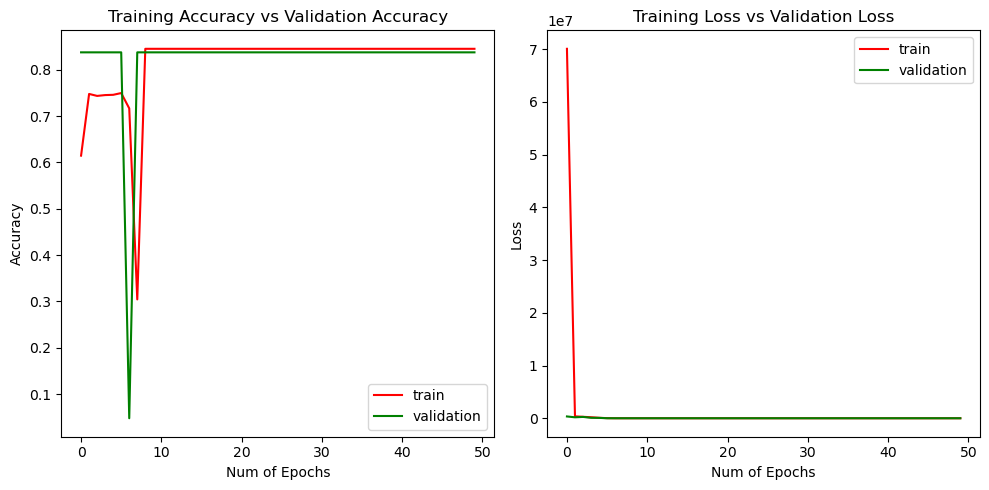

In [1370]:
_, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100)
ax[0].plot(history.history['acc'], 'r')
ax[0].plot(history.history['val_acc'], 'g')
ax[0].set_xlabel("Num of Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Training Accuracy vs Validation Accuracy")
ax[0].legend(['train', 'validation'])

ax[1].plot(history.history['loss'], 'r')
ax[1].plot(history.history['val_loss'], 'g')
ax[1].set_xlabel("Num of Epochs")
ax[1].set_ylabel("Loss")
ax[1].set_title("Training Loss vs Validation Loss")
ax[1].legend(['train', 'validation'])

plt.tight_layout()

Vector con las probabilidades predecidas por la red de cada categoría en cada chunk

In [1371]:
y_hat = model.predict(x=dfinput_nofilter_x)
y_hat

array([[4.6794827e-07, 3.0395282e-09, 3.2107734e-09, ..., 1.3982685e-02,
        2.7428599e-09, 1.9852535e-03],
       [4.6794827e-07, 3.0395282e-09, 3.2107734e-09, ..., 1.3982685e-02,
        2.7428599e-09, 1.9852535e-03],
       [4.6794827e-07, 3.0395282e-09, 3.2107734e-09, ..., 1.3982685e-02,
        2.7428599e-09, 1.9852535e-03],
       ...,
       [4.6794827e-07, 3.0395282e-09, 3.2107734e-09, ..., 1.3982685e-02,
        2.7428599e-09, 1.9852535e-03],
       [4.6794827e-07, 3.0395282e-09, 3.2107734e-09, ..., 1.3982685e-02,
        2.7428599e-09, 1.9852535e-03],
       [4.6794827e-07, 3.0395282e-09, 3.2107734e-09, ..., 1.3982685e-02,
        2.7428599e-09, 1.9852535e-03]], dtype=float32)

In [1372]:
y_pred_label = np.argmax(y_hat, axis = 1)
y_true_label = np.argmax(dfinput_nofilter_y, axis = 1)

Vector de predicciones

In [1373]:
y_pred_label

array([8, 8, 8, ..., 8, 8, 8])

Categorías que se han predicho.
(En este caso se repite siempre la misma, la número 9)

In [1374]:
unique, counts = np.unique(y_pred_label, return_counts=True)
result = np.column_stack((unique, counts))
result

array([[    8, 21168]])

Vector de resultados reales

In [1375]:
y_true_label

array([8, 8, 8, ..., 8, 8, 8])

Mejores categorías reales y en cuantos splits lo son.

In [1376]:
unique, counts = np.unique(y_true_label, return_counts=True)
result = np.column_stack((unique, counts))
result

array([[    6,  1082],
       [    7,   168],
       [    8, 17874],
       [   11,     2],
       [   12,     2],
       [   13,   994],
       [   14,   707],
       [   21,   300],
       [   23,    39]])

In [1377]:
tabla = pd.crosstab(y_pred_label, y_true_label)
tabla

col_0,6,7,8,11,12,13,14,21,23
row_0,,,,,,,,,
8,1082,168,17874,2,2,994,707,300,39


CONCLUSIÓN:
    
Al añadir todos los datos del dataset, la precisión (87.8%) y la pérdida (0.57) han mejorado mucho. El problema está en que
al ver las predicciones que ha hecho la red, observamos que predice SIEMPRE la misma categoría (9 = zstd_shuffle_split), y aunque
en las mejores categorías reales observamos que la categoría 9 es la mejor un 86.6% de las veces, me resulta
extraño que siempre prediga la misma.

# PREPARACIÓN PARA NN SHUFFLE

Dataframe para shuffle

In [1378]:
#dataframes[ficheros[32]]

In [1379]:
dfSHUFFLE = pd.DataFrame()
for i in range(3, len(ficheros)):
    dfSHUFFLE = pd.concat([dfSHUFFLE, dataframes[ficheros[i]]], axis = 1)
    
dfSHUFFLE = pd.concat([dfSHUFFLE, dataframes[ficheros[1]]], axis = 1)

In [1420]:
#dfSHUFFLE

Si el chunk es special value en alguna de las combinaciones, se elimina.

In [1381]:
def delete_final(delete0, delete1, delete2, delete3, delete4, delete5, delete6, delete7, delete8, delete9, delete10, delete11, delete12, delete13, delete14, delete15, delete16, delete17, delete18, delete19, delete20, delete21, delete22, delete23, delete24, delete25, delete26, delete27, delete28, delete29, delete32):
    return 1 if delete0 == 1 or delete1 == 1 or delete2 == 1 or delete3 == 1 or delete4 == 1 or delete5 == 1 or delete6 == 1 or delete7 == 1 or delete8 == 1 or delete9 == 1 or delete10 == 1 or delete11 == 1 or delete12 == 1 or delete13 == 1 or delete14 == 1 or delete15 == 1 or delete16 == 1 or delete17 == 1 or delete18 == 1 or delete19 == 1 or delete20 == 1 or delete21 == 1 or delete22 == 1 or delete23 == 1 or delete24 == 1 or delete25 == 1 or delete26 == 1 or delete27 == 1 or delete28 == 1 or delete29 == 1 or delete32 == 1 else 0




In [1382]:
dfSHUFFLE["delete_f"] = dfSHUFFLE.apply(lambda x: delete_final(x[2], x[5], x[8], x[11], x[14], x[17], x[20], x[23], 
                                                     x[26], x[29], x[32], x[35], x[38], x[41], x[44], x[47], x[50], 
                                                     x[53], x[56], x[59], x[62], x[65], x[68], x[71], x[74], x[77], 
                                                     x[80], x[83], x[86], x[89], x[92]), axis=1)

In [1383]:
#dfSHUFFLE

Elimino los splits en los que alguna de las 31 combinaciones (nofilter y no entropy) sea un special_val

In [1384]:
dfSHUFFLE = dfSHUFFLE[dfSHUFFLE['delete_f'] == 0]

In [1385]:
#dfSHUFFLE

In [1386]:
dfSHUFFLE = dfSHUFFLE.drop(['delete0', 'delete1', 'delete2', 'delete3', 'delete4', 'delete5', 'delete6', 'delete7', 'delete8', 
              'delete9', 'delete10', 'delete11', 'delete12', 'delete13', 'delete14', 'delete15', 'delete16', 
              'delete17', 'delete18', 'delete19', 'delete20', 'delete21', 'delete22', 'delete23', 'delete24', 
              'delete25', 'delete26', 'delete27', 'delete28', 'delete29', 'delete_f', 'delete32'], axis = 1)

In [1419]:
#dfSHUFFLE

Para calcular la mejor categoría, no tengo en cuenta los datos de la combinación de entropy-nofilter, por lo que los separo

In [1388]:
dfinput_shuffle_x = dfSHUFFLE.iloc[:, [60, 61]]

In [1389]:
dfSHUFFLE.shape

(21168, 62)

In [1390]:
dfSHUFFLE = dfSHUFFLE.drop(columns = ["cratio", "speed"])

In [1391]:
dfSHUFFLE.shape

(21168, 60)

In [1392]:
#dfSHUFFLE

In [1393]:
mean_cratio = 0
for i in range(0, 30):
    mean_cratio = mean_cratio + dfSHUFFLE.iloc[:, 2*i].mean()

mean_cratio = mean_cratio/30
mean_cratio

41.033370606575964

In [1394]:
mean_speed = 0
for i in range(0, 30):
    mean_speed = mean_speed + dfSHUFFLE.iloc[:, 2*i + 1].mean()

mean_speed = mean_speed/30
mean_speed

370608524.6126227

mean_cratio: 9133 --> 41, una diferencia de 9092
mean_speed: 2.504.054.248 --> 370.608.524, una diferencia de 2.133.445.724

In [1395]:
dataframes_filtered = {}

for i in range(0, 30):
    dataframes_filtered[ficheros[i+3]] = dfSHUFFLE.iloc[:, [2*i, 2*i + 1]]
    
#dataframes_filtered[ficheros[32]]

In [1396]:
for i in range (0, 30):
    dataframes_filtered[ficheros[i+3]].insert(2, str(i), dataframes_filtered[ficheros[i+3]]['cratio'+str(i)]/mean_cratio + dataframes_filtered[ficheros[i+3]]['speed'+str(i)]/mean_speed)

In [1397]:
#dataframes_filtered[ficheros[3]]

In [1398]:
dfSHUFFLE_filtered = pd.DataFrame()
for i in range(3, len(ficheros)):
    dfSHUFFLE_filtered = pd.concat([dfSHUFFLE_filtered, dataframes_filtered[ficheros[i]]], axis = 1)

In [1399]:
dfSHUFFLE_filtered

,cratio0,speed0,0,cratio1,speed1,1,cratio2,speed2,2,cratio3,...,26,cratio27,speed27,27,cratio28,speed28,28,cratio29,speed29,29
2,73.1,3.240000e+09,10.523855,29.30,1.280000e+09,4.167832,36.30,1.100000e+09,3.852737,68.0,...,3.906156,244.0,49900000.0,6.081023,193.0,73900000.0,4.902891,248.0,82500000.0,6.266468
3,58.5,2.390000e+09,7.874522,35.30,1.950000e+09,6.121892,42.10,1.570000e+09,5.262270,51.0,...,3.906156,244.0,49900000.0,6.081023,193.0,73900000.0,4.902891,248.0,82500000.0,6.266468
6,22.3,1.230000e+09,3.862326,11.20,6.490000e+08,2.024123,14.00,6.860000e+08,2.192195,19.0,...,2.019536,90.1,45500000.0,2.318545,69.6,52700000.0,1.838379,90.8,53100000.0,2.356111
7,23.4,1.450000e+09,4.482752,14.60,8.270000e+08,2.587273,19.30,9.090000e+08,2.923072,19.1,...,2.019536,90.1,45500000.0,2.318545,69.6,52700000.0,1.838379,90.8,53100000.0,2.356111
10,19.2,1.100000e+09,3.436003,3.46,1.750000e+08,0.556518,5.15,3.460000e+08,1.059107,18.0,...,0.662761,25.7,21800000.0,0.685142,24.3,27900000.0,0.667483,22.5,32700000.0,0.636567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55107,49.3,2.640000e+09,8.324881,35.40,1.580000e+09,5.125971,45.30,1.910000e+09,6.257666,45.7,...,4.317841,264.0,48900000.0,6.565733,194.0,79100000.0,4.941292,352.0,95300000.0,8.835528
55138,55.2,2.970000e+09,9.359094,30.20,1.480000e+09,4.729418,43.20,1.910000e+09,6.206488,50.9,...,3.800665,232.0,52700000.0,5.796133,164.0,66400000.0,4.175912,269.0,86700000.0,6.789579
55139,207.0,5.560000e+09,20.047028,29.90,1.460000e+09,4.668142,38.20,2.310000e+09,7.163942,210.0,...,3.800665,232.0,52700000.0,5.796133,164.0,66400000.0,4.175912,269.0,86700000.0,6.789579
55170,223.0,5.760000e+09,20.976607,88.00,2.800000e+09,9.699738,95.10,2.810000e+09,9.899750,228.0,...,7.976014,726.0,56400000.0,17.845099,488.0,98400000.0,12.158269,910.0,103000000.0,22.454993


In [1400]:
df_pos = dfSHUFFLE_filtered
for i in range(0, 30):
    df_pos = df_pos.drop(['cratio' + str(i), 'speed' + str(i)], axis = 1)

In [1401]:
df_pos

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
2,10.523855,4.167832,3.852737,6.055360,2.893126,3.653935,2.071816,1.763299,1.335218,3.648874,...,6.672472,2.306225,3.153113,2.397710,4.209480,3.830518,3.906156,6.081023,4.902891,6.266468
3,7.874522,6.121892,5.262270,5.128392,3.312049,4.433294,1.879037,2.114666,1.587312,3.185923,...,6.672472,2.306225,3.153113,2.397710,4.209480,3.830518,3.906156,6.081023,4.902891,6.266468
6,3.862326,2.024123,2.192195,2.751166,1.320157,2.145019,0.847287,0.792335,0.534708,1.403535,...,3.551401,1.024895,1.684097,1.112500,1.767943,1.683795,2.019536,2.318545,1.838379,2.356111
7,4.482752,2.587273,2.923072,2.651069,1.739151,2.971118,0.826763,1.164062,0.694152,1.483731,...,3.551401,1.024895,1.684097,1.112500,1.767943,1.683795,2.019536,2.318545,1.838379,2.356111
10,3.436003,0.556518,1.059107,2.985829,0.695313,0.831217,0.925889,0.278324,0.218370,1.500871,...,2.347041,0.497249,0.651144,0.529157,0.780313,0.705956,0.662761,0.685142,0.667483,0.636567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55107,8.324881,5.125971,6.257666,5.484917,3.535046,4.784929,2.024031,1.771061,1.462038,3.264344,...,7.489741,2.898937,3.572893,2.428433,5.593283,4.401831,4.317841,6.565733,4.941292,8.835528
55138,9.359094,4.729418,6.206488,5.962417,3.162341,4.209071,2.305481,1.804124,1.327140,3.765588,...,6.603519,2.721328,3.104631,2.215592,5.108659,3.692477,3.800665,5.796133,4.175912,6.789579
55139,20.047028,4.668142,7.163942,12.591980,2.980688,4.153369,5.871290,1.591225,1.327958,14.376820,...,6.603519,2.721328,3.104631,2.215592,5.108659,3.692477,3.800665,5.796133,4.175912,6.789579
55170,20.976607,9.699738,9.899750,13.192543,5.653567,6.265965,5.839771,3.253035,3.024113,16.188239,...,9.880685,4.724105,5.129815,4.228258,11.902348,9.465307,7.976014,17.845099,12.158269,22.454993


In [1402]:
pos_min = df_pos.idxmin(axis=1)
pos_min = pd.DataFrame(pos_min, columns=['pos_min'])

In [1403]:
pos_min['pos_min'].unique()

array(['8', '6', '14', '21', '7', '13', '11', '23', '12'], dtype=object)

In [1404]:
dfinput_shuffle_y = pos_min

Inputs

In [1405]:
dfinput_shuffle_x.shape

(21168, 2)

In [1406]:
dfinput_shuffle_y.shape

(21168, 1)

In [1407]:
from keras.utils import to_categorical
dfinput_shuffle_y = to_categorical(dfinput_shuffle_y)

PROBLEMA: 
Hay 30 categorías (0-29). Al calcular las mejores en cada caso, la categoría con índice más elevado ha sido la 27.
Por lo tanto, cuando hago to_categorical de estos resultados, solo me salen 28 de las 30 categorías.
Es decir, la red nunca podrá predecir que en algun caso la mejor categoría es la número 28 o 29.

In [1408]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(1,2)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(24, activation='softmax'))

In [1409]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [1410]:
history = model.fit(dfinput_shuffle_x, dfinput_shuffle_y, epochs=50, validation_split=0.1)

Epoch 1/50
596/596 [==============================] - 1s 715us/step - loss: 2.9470 - acc: 0.8343 - val_loss: 2.2990 - val_acc: 0.8375
Epoch 2/50
596/596 [==============================] - 0s 478us/step - loss: 2.1036 - acc: 0.8462 - val_loss: 1.6142 - val_acc: 0.8375
Epoch 3/50
596/596 [==============================] - 0s 526us/step - loss: 1.4815 - acc: 0.8424 - val_loss: 1.1803 - val_acc: 0.8375
Epoch 4/50
596/596 [==============================] - 0s 505us/step - loss: 1.0937 - acc: 0.8462 - val_loss: 0.9552 - val_acc: 0.8375
Epoch 5/50
596/596 [==============================] - 0s 520us/step - loss: 0.8968 - acc: 0.8473 - val_loss: 0.8451 - val_acc: 0.8375
Epoch 6/50
596/596 [==============================] - 0s 458us/step - loss: 0.8129 - acc: 0.8430 - val_loss: 0.7878 - val_acc: 0.8375
Epoch 7/50
596/596 [==============================] - 0s 468us/step - loss: 0.7515 - acc: 0.8469 - val_loss: 0.7554 - val_acc: 0.8375
Epoch 8/50
596/596 [==============================] - 0s 505us

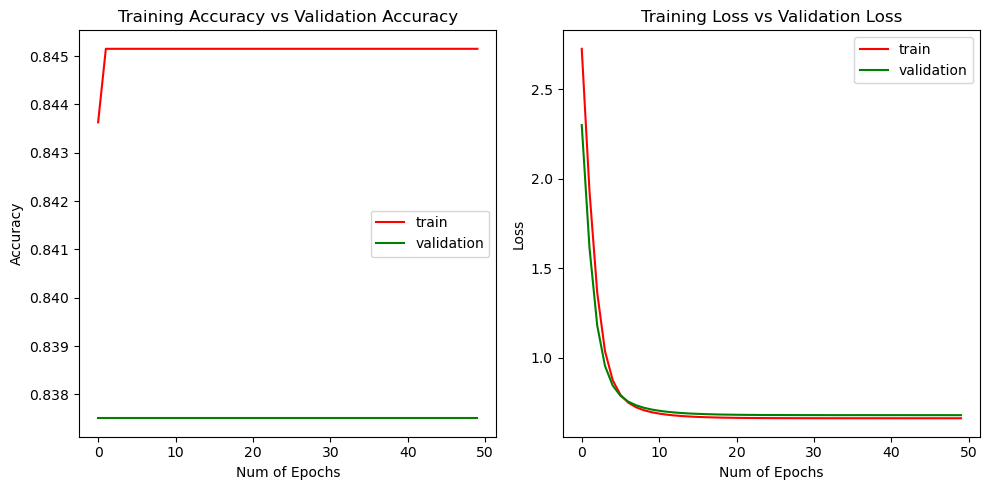

In [1411]:
_, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100)
ax[0].plot(history.history['acc'], 'r')
ax[0].plot(history.history['val_acc'], 'g')
ax[0].set_xlabel("Num of Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Training Accuracy vs Validation Accuracy")
ax[0].legend(['train', 'validation'])

ax[1].plot(history.history['loss'], 'r')
ax[1].plot(history.history['val_loss'], 'g')
ax[1].set_xlabel("Num of Epochs")
ax[1].set_ylabel("Loss")
ax[1].set_title("Training Loss vs Validation Loss")
ax[1].legend(['train', 'validation'])

plt.tight_layout()

Vector con las probabilidades predecidas por la red de cada categoría en cada chunk

In [1412]:
y_hat = model.predict(x=dfinput_shuffle_x)
y_hat

array([[1.14742384e-07, 1.14742384e-07, 1.14742384e-07, ...,
        1.41729442e-02, 1.14742384e-07, 1.99334300e-03],
       [1.14742384e-07, 1.14742384e-07, 1.14742384e-07, ...,
        1.41729442e-02, 1.14742384e-07, 1.99334300e-03],
       [1.14742384e-07, 1.14742384e-07, 1.14742384e-07, ...,
        1.41729442e-02, 1.14742384e-07, 1.99334300e-03],
       ...,
       [1.14742384e-07, 1.14742384e-07, 1.14742384e-07, ...,
        1.41729442e-02, 1.14742384e-07, 1.99334300e-03],
       [1.14742384e-07, 1.14742384e-07, 1.14742384e-07, ...,
        1.41729442e-02, 1.14742384e-07, 1.99334300e-03],
       [1.14742384e-07, 1.14742384e-07, 1.14742384e-07, ...,
        1.41729442e-02, 1.14742384e-07, 1.99334300e-03]], dtype=float32)

In [1413]:
y_pred_label = np.argmax(y_hat, axis = 1)
y_true_label = np.argmax(dfinput_shuffle_y, axis = 1)

Vector de predicciones

In [1414]:
y_pred_label

array([8, 8, 8, ..., 8, 8, 8])

Categorías que se han predicho.
(En este caso se repite siempre la misma, la número 9)

In [1415]:
unique, counts = np.unique(y_pred_label, return_counts=True)
result = np.column_stack((unique, counts))
result

array([[    8, 21168]])

Vector de resultados reales

In [1416]:
y_true_label

array([8, 8, 8, ..., 8, 8, 8])

Mejores categorías reales y en cuantos splits lo son.

In [1417]:
unique, counts = np.unique(y_true_label, return_counts=True)
result = np.column_stack((unique, counts))
result

array([[    6,  1082],
       [    7,   168],
       [    8, 17874],
       [   11,     2],
       [   12,     2],
       [   13,   994],
       [   14,   707],
       [   21,   300],
       [   23,    39]])

In [1418]:
tabla = pd.crosstab(y_pred_label, y_true_label)
tabla

col_0,6,7,8,11,12,13,14,21,23
row_0,,,,,,,,,
8,1082,168,17874,2,2,994,707,300,39


CONCLUSIÓN:
    
Al añadir todos los datos del dataset, la precisión (87.8%) y la pérdida (0.57) han mejorado mucho. El problema está en que
al ver las predicciones que ha hecho la red, observamos que predice SIEMPRE la misma categoría (9 = zstd_shuffle_split), y aunque
en las mejores categorías reales observamos que la categoría 9 es la mejor un 86.6% de las veces, me resulta
extraño que siempre prediga la misma.

# PREPARACIÓN PARA NN BITSHUFFLE

Dataframe para bitshuffle

In [1117]:
#dataframes[ficheros[32]]

In [1173]:
dfBITSHUFFLE = pd.DataFrame()
for i in range(3, len(ficheros)):
    dfBITSHUFFLE = pd.concat([dfBITSHUFFLE, dataframes[ficheros[i]]], axis = 1)
    
dfBITSHUFFLE = pd.concat([dfBITSHUFFLE, dataframes[ficheros[0]]], axis = 1)

In [1174]:
dfBITSHUFFLE

,cratio0,speed0,delete0,cratio1,speed1,delete1,cratio2,speed2,delete2,cratio3,...,delete27,cratio28,speed28,delete28,cratio29,speed29,delete29,cratio,speed,delete31
0,110.0,2.180000e+09,0,16400.0,5.780000e+09,1,16400.0,7.320000e+09,1,107.0,...,0,193.0,7.390000e+07,0,248.0,8.250000e+07,0,70.3,1.530000e+10,0
1,83.4,2.700000e+09,0,16400.0,6.960000e+09,1,16400.0,7.670000e+09,1,73.4,...,0,193.0,7.390000e+07,0,248.0,8.250000e+07,0,44.4,1.730000e+10,0
2,73.1,3.240000e+09,0,29.3,1.280000e+09,0,36.3,1.100000e+09,0,68.0,...,0,193.0,7.390000e+07,0,248.0,8.250000e+07,0,31.2,1.690000e+10,0
3,58.5,2.390000e+09,0,35.3,1.950000e+09,0,42.1,1.570000e+09,0,51.0,...,0,193.0,7.390000e+07,0,248.0,8.250000e+07,0,27.4,1.530000e+10,0
4,42.0,1.790000e+09,0,16400.0,6.900000e+09,1,16400.0,6.050000e+09,1,38.1,...,0,69.6,5.270000e+07,0,90.8,5.310000e+07,0,55.9,1.810000e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55291,16400.0,5.780000e+09,1,16400.0,7.220000e+09,1,16400.0,7.080000e+09,1,16400.0,...,1,65500.0,9.530000e+09,1,65500.0,8.300000e+09,1,16400.0,7.390000e+09,1
55292,16400.0,6.050000e+09,1,16400.0,7.280000e+09,1,16400.0,4.950000e+09,1,16400.0,...,1,65500.0,9.550000e+09,1,65500.0,8.190000e+09,1,16400.0,7.180000e+09,1
55293,16400.0,7.280000e+09,1,16400.0,5.700000e+09,1,16400.0,7.530000e+09,1,16400.0,...,1,65500.0,9.550000e+09,1,65500.0,8.190000e+09,1,16400.0,7.670000e+09,1
55294,16400.0,5.110000e+09,1,16400.0,5.960000e+09,1,16400.0,7.670000e+09,1,16400.0,...,1,65500.0,9.550000e+09,1,65500.0,8.190000e+09,1,16400.0,5.870000e+09,1


Si el chunk es special value en alguna de las combinaciones, se elimina.

In [1175]:
def delete_final(delete0, delete1, delete2, delete3, delete4, delete5, delete6, delete7, delete8, delete9, delete10, delete11, delete12, delete13, delete14, delete15, delete16, delete17, delete18, delete19, delete20, delete21, delete22, delete23, delete24, delete25, delete26, delete27, delete28, delete29, delete32):
    return 1 if delete0 == 1 or delete1 == 1 or delete2 == 1 or delete3 == 1 or delete4 == 1 or delete5 == 1 or delete6 == 1 or delete7 == 1 or delete8 == 1 or delete9 == 1 or delete10 == 1 or delete11 == 1 or delete12 == 1 or delete13 == 1 or delete14 == 1 or delete15 == 1 or delete16 == 1 or delete17 == 1 or delete18 == 1 or delete19 == 1 or delete20 == 1 or delete21 == 1 or delete22 == 1 or delete23 == 1 or delete24 == 1 or delete25 == 1 or delete26 == 1 or delete27 == 1 or delete28 == 1 or delete29 == 1 or delete32 == 1 else 0




In [1177]:
dfBITSHUFFLE["delete_f"] = dfBITSHUFFLE.apply(lambda x: delete_final(x[2], x[5], x[8], x[11], x[14], x[17], x[20], x[23], 
                                                     x[26], x[29], x[32], x[35], x[38], x[41], x[44], x[47], x[50], 
                                                     x[53], x[56], x[59], x[62], x[65], x[68], x[71], x[74], x[77], 
                                                     x[80], x[83], x[86], x[89], x[92]), axis=1)

Elimino los splits en los que alguna de las 31 combinaciones (bitshuffle y no entropy) sea un special_val

In [1178]:
dfBITSHUFFLE = dfBITSHUFFLE[dfBITSHUFFLE['delete_f'] == 0]

In [1179]:
#dfBITSHUFFLE

In [1180]:
dfBITSHUFFLE = dfBITSHUFFLE.drop(['delete0', 'delete1', 'delete2', 'delete3', 'delete4', 'delete5', 'delete6', 'delete7', 'delete8', 
              'delete9', 'delete10', 'delete11', 'delete12', 'delete13', 'delete14', 'delete15', 'delete16', 
              'delete17', 'delete18', 'delete19', 'delete20', 'delete21', 'delete22', 'delete23', 'delete24', 
              'delete25', 'delete26', 'delete27', 'delete28', 'delete29', 'delete_f', 'delete31'], axis = 1)

In [1181]:
#dfBITSHUFFLE

Para calcular la mejor categoría, no tengo en cuenta los datos de la combinación de entropy-nofilter, por lo que los separo

In [1182]:
dfinput_bitshuffle_x = dfBITSHUFFLE.iloc[:, [60, 61]]

In [1183]:
dfBITSHUFFLE.shape

(21168, 62)

In [1184]:
dfBITSHUFFLE

,cratio0,speed0,cratio1,speed1,cratio2,speed2,cratio3,speed3,cratio4,speed4,...,cratio26,speed26,cratio27,speed27,cratio28,speed28,cratio29,speed29,cratio,speed
2,73.1,3.240000e+09,29.30,1.280000e+09,36.30,1.100000e+09,68.0,1.630000e+09,22.50,8.690000e+08,...,146.0,129000000.0,244.0,49900000.0,193.0,73900000.0,248.0,82500000.0,31.2,1.690000e+10
3,58.5,2.390000e+09,35.30,1.950000e+09,42.10,1.570000e+09,51.0,1.440000e+09,27.40,9.800000e+08,...,146.0,129000000.0,244.0,49900000.0,193.0,73900000.0,248.0,82500000.0,27.4,1.530000e+10
6,22.3,1.230000e+09,11.20,6.490000e+08,14.00,6.860000e+08,19.0,8.480000e+08,7.89,4.180000e+08,...,70.8,109000000.0,90.1,45500000.0,69.6,52700000.0,90.8,53100000.0,55.2,2.040000e+10
7,23.4,1.450000e+09,14.60,8.270000e+08,19.30,9.090000e+08,19.1,8.100000e+08,10.80,5.470000e+08,...,70.8,109000000.0,90.1,45500000.0,69.6,52700000.0,90.8,53100000.0,29.4,1.570000e+10
10,19.2,1.100000e+09,3.46,1.750000e+08,5.15,3.460000e+08,18.0,9.440000e+08,3.73,2.240000e+08,...,19.6,68600000.0,25.7,21800000.0,24.3,27900000.0,22.5,32700000.0,78.4,2.130000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55107,49.3,2.640000e+09,35.40,1.580000e+09,45.30,1.910000e+09,45.7,1.620000e+09,28.80,1.050000e+09,...,164.0,119000000.0,264.0,48900000.0,194.0,79100000.0,352.0,95300000.0,135.0,2.250000e+10
55138,55.2,2.970000e+09,30.20,1.480000e+09,43.20,1.910000e+09,50.9,1.750000e+09,24.80,9.480000e+08,...,143.0,117000000.0,232.0,52700000.0,164.0,66400000.0,269.0,86700000.0,33.5,1.670000e+10
55139,207.0,5.560000e+09,29.90,1.460000e+09,38.20,2.310000e+09,210.0,2.770000e+09,24.10,8.870000e+08,...,143.0,117000000.0,232.0,52700000.0,164.0,66400000.0,269.0,86700000.0,123.0,2.620000e+10
55170,223.0,5.760000e+09,88.00,2.800000e+09,95.10,2.810000e+09,228.0,2.830000e+09,80.30,1.370000e+09,...,313.0,129000000.0,726.0,56400000.0,488.0,98400000.0,910.0,103000000.0,120.0,2.810000e+10


In [1185]:
dfBITSHUFFLE = dfBITSHUFFLE.drop(columns = ["cratio", "speed"])

In [1186]:
dfBITSHUFFLE.shape

(21168, 60)

In [1187]:
#dfBITSHUFFLE

In [1188]:
mean_cratio = 0
for i in range(0, 30):
    mean_cratio = mean_cratio + dfBITSHUFFLE.iloc[:, 2*i].mean()

mean_cratio = mean_cratio/30
mean_cratio

41.033370606575964

In [1189]:
mean_speed = 0
for i in range(0, 30):
    mean_speed = mean_speed + dfBITSHUFFLE.iloc[:, 2*i + 1].mean()

mean_speed = mean_speed/30
mean_speed

370608524.6126227

mean_cratio: 9133 --> 41, una diferencia de 9092
mean_speed: 2.504.054.248 --> 370.608.524, una diferencia de 2.133.445.724

In [1190]:
dataframes_filtered = {}

for i in range(0, 30):
    dataframes_filtered[ficheros[i+3]] = dfBITSHUFFLE.iloc[:, [2*i, 2*i + 1]]
    
#dataframes_filtered[ficheros[32]]

In [1191]:
for i in range (0, 30):
    dataframes_filtered[ficheros[i+3]].insert(2, str(i), dataframes_filtered[ficheros[i+3]]['cratio'+str(i)]/mean_cratio + dataframes_filtered[ficheros[i+3]]['speed'+str(i)]/mean_speed)

In [1192]:
#dataframes_filtered[ficheros[3]]

In [1193]:
dfBITSHUFFLE_filtered = pd.DataFrame()
for i in range(3, len(ficheros)):
    dfBITSHUFFLE_filtered = pd.concat([dfBITSHUFFLE_filtered, dataframes_filtered[ficheros[i]]], axis = 1)

In [1194]:
dfBITSHUFFLE_filtered

,cratio0,speed0,0,cratio1,speed1,1,cratio2,speed2,2,cratio3,...,26,cratio27,speed27,27,cratio28,speed28,28,cratio29,speed29,29
2,73.1,3.240000e+09,10.523855,29.30,1.280000e+09,4.167832,36.30,1.100000e+09,3.852737,68.0,...,3.906156,244.0,49900000.0,6.081023,193.0,73900000.0,4.902891,248.0,82500000.0,6.266468
3,58.5,2.390000e+09,7.874522,35.30,1.950000e+09,6.121892,42.10,1.570000e+09,5.262270,51.0,...,3.906156,244.0,49900000.0,6.081023,193.0,73900000.0,4.902891,248.0,82500000.0,6.266468
6,22.3,1.230000e+09,3.862326,11.20,6.490000e+08,2.024123,14.00,6.860000e+08,2.192195,19.0,...,2.019536,90.1,45500000.0,2.318545,69.6,52700000.0,1.838379,90.8,53100000.0,2.356111
7,23.4,1.450000e+09,4.482752,14.60,8.270000e+08,2.587273,19.30,9.090000e+08,2.923072,19.1,...,2.019536,90.1,45500000.0,2.318545,69.6,52700000.0,1.838379,90.8,53100000.0,2.356111
10,19.2,1.100000e+09,3.436003,3.46,1.750000e+08,0.556518,5.15,3.460000e+08,1.059107,18.0,...,0.662761,25.7,21800000.0,0.685142,24.3,27900000.0,0.667483,22.5,32700000.0,0.636567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55107,49.3,2.640000e+09,8.324881,35.40,1.580000e+09,5.125971,45.30,1.910000e+09,6.257666,45.7,...,4.317841,264.0,48900000.0,6.565733,194.0,79100000.0,4.941292,352.0,95300000.0,8.835528
55138,55.2,2.970000e+09,9.359094,30.20,1.480000e+09,4.729418,43.20,1.910000e+09,6.206488,50.9,...,3.800665,232.0,52700000.0,5.796133,164.0,66400000.0,4.175912,269.0,86700000.0,6.789579
55139,207.0,5.560000e+09,20.047028,29.90,1.460000e+09,4.668142,38.20,2.310000e+09,7.163942,210.0,...,3.800665,232.0,52700000.0,5.796133,164.0,66400000.0,4.175912,269.0,86700000.0,6.789579
55170,223.0,5.760000e+09,20.976607,88.00,2.800000e+09,9.699738,95.10,2.810000e+09,9.899750,228.0,...,7.976014,726.0,56400000.0,17.845099,488.0,98400000.0,12.158269,910.0,103000000.0,22.454993


In [1195]:
df_pos = dfBITSHUFFLE_filtered
for i in range(0, 30):
    df_pos = df_pos.drop(['cratio' + str(i), 'speed' + str(i)], axis = 1)

In [1196]:
df_pos

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
2,10.523855,4.167832,3.852737,6.055360,2.893126,3.653935,2.071816,1.763299,1.335218,3.648874,...,6.672472,2.306225,3.153113,2.397710,4.209480,3.830518,3.906156,6.081023,4.902891,6.266468
3,7.874522,6.121892,5.262270,5.128392,3.312049,4.433294,1.879037,2.114666,1.587312,3.185923,...,6.672472,2.306225,3.153113,2.397710,4.209480,3.830518,3.906156,6.081023,4.902891,6.266468
6,3.862326,2.024123,2.192195,2.751166,1.320157,2.145019,0.847287,0.792335,0.534708,1.403535,...,3.551401,1.024895,1.684097,1.112500,1.767943,1.683795,2.019536,2.318545,1.838379,2.356111
7,4.482752,2.587273,2.923072,2.651069,1.739151,2.971118,0.826763,1.164062,0.694152,1.483731,...,3.551401,1.024895,1.684097,1.112500,1.767943,1.683795,2.019536,2.318545,1.838379,2.356111
10,3.436003,0.556518,1.059107,2.985829,0.695313,0.831217,0.925889,0.278324,0.218370,1.500871,...,2.347041,0.497249,0.651144,0.529157,0.780313,0.705956,0.662761,0.685142,0.667483,0.636567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55107,8.324881,5.125971,6.257666,5.484917,3.535046,4.784929,2.024031,1.771061,1.462038,3.264344,...,7.489741,2.898937,3.572893,2.428433,5.593283,4.401831,4.317841,6.565733,4.941292,8.835528
55138,9.359094,4.729418,6.206488,5.962417,3.162341,4.209071,2.305481,1.804124,1.327140,3.765588,...,6.603519,2.721328,3.104631,2.215592,5.108659,3.692477,3.800665,5.796133,4.175912,6.789579
55139,20.047028,4.668142,7.163942,12.591980,2.980688,4.153369,5.871290,1.591225,1.327958,14.376820,...,6.603519,2.721328,3.104631,2.215592,5.108659,3.692477,3.800665,5.796133,4.175912,6.789579
55170,20.976607,9.699738,9.899750,13.192543,5.653567,6.265965,5.839771,3.253035,3.024113,16.188239,...,9.880685,4.724105,5.129815,4.228258,11.902348,9.465307,7.976014,17.845099,12.158269,22.454993


In [1197]:
pos_min = df_pos.idxmin(axis=1)
pos_min = pd.DataFrame(pos_min, columns=['pos_min'])

In [1198]:
pos_min['pos_min'].unique()

array(['8', '6', '14', '21', '7', '13', '11', '23', '12'], dtype=object)

In [1199]:
dfinput_bitshuffle_y = pos_min

Inputs

In [1200]:
dfinput_bitshuffle_x.shape

(21168, 2)

In [1201]:
dfinput_bitshuffle_y.shape

(21168, 1)

In [1202]:
from keras.utils import to_categorical
dfinput_bitshuffle_y = to_categorical(dfinput_bitshuffle_y)

PROBLEMA: 
Hay 30 categorías (0-29). Al calcular las mejores en cada caso, la categoría con índice más elevado ha sido la 27.
Por lo tanto, cuando hago to_categorical de estos resultados, solo me salen 28 de las 30 categorías.
Es decir, la red nunca podrá predecir que en algun caso la mejor categoría es la número 28 o 29.

In [1203]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(1,2)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(24, activation='softmax'))

In [1204]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [1205]:
history = model.fit(dfinput_bitshuffle_x, dfinput_bitshuffle_y, epochs=50, validation_split=0.1)

Epoch 1/50
596/596 [==============================] - 1s 868us/step - loss: 2.9463 - acc: 0.8209 - val_loss: 2.2993 - val_acc: 0.8375
Epoch 2/50
596/596 [==============================] - 0s 542us/step - loss: 2.1118 - acc: 0.8392 - val_loss: 1.6127 - val_acc: 0.8375
Epoch 3/50
596/596 [==============================] - 0s 525us/step - loss: 1.4766 - acc: 0.8440 - val_loss: 1.1796 - val_acc: 0.8375
Epoch 4/50
596/596 [==============================] - 0s 468us/step - loss: 1.0972 - acc: 0.8451 - val_loss: 0.9547 - val_acc: 0.8375
Epoch 5/50
596/596 [==============================] - 0s 508us/step - loss: 0.8843 - acc: 0.8520 - val_loss: 0.8451 - val_acc: 0.8375
Epoch 6/50
596/596 [==============================] - 0s 528us/step - loss: 0.8141 - acc: 0.8428 - val_loss: 0.7879 - val_acc: 0.8375
Epoch 7/50
596/596 [==============================] - 0s 495us/step - loss: 0.7547 - acc: 0.8462 - val_loss: 0.7553 - val_acc: 0.8375
Epoch 8/50
596/596 [==============================] - 0s 467us

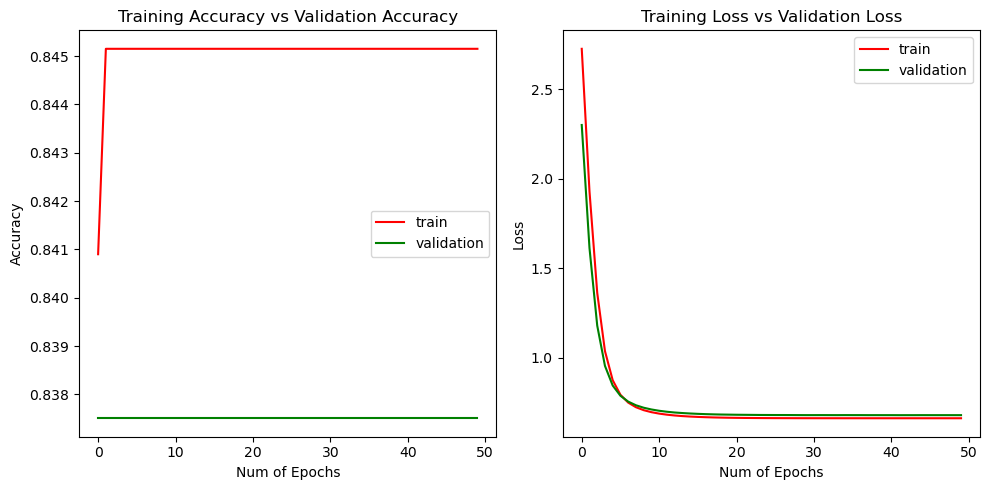

In [1206]:
_, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100)
ax[0].plot(history.history['acc'], 'r')
ax[0].plot(history.history['val_acc'], 'g')
ax[0].set_xlabel("Num of Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Training Accuracy vs Validation Accuracy")
ax[0].legend(['train', 'validation'])

ax[1].plot(history.history['loss'], 'r')
ax[1].plot(history.history['val_loss'], 'g')
ax[1].set_xlabel("Num of Epochs")
ax[1].set_ylabel("Loss")
ax[1].set_title("Training Loss vs Validation Loss")
ax[1].legend(['train', 'validation'])

plt.tight_layout()

Vector con las probabilidades predecidas por la red de cada categoría en cada chunk

In [1207]:
y_hat = model.predict(x=dfinput_bitshuffle_x)
y_hat

array([[1.1443704e-07, 1.1443704e-07, 1.1443704e-07, ..., 1.4001340e-02,
        1.1443704e-07, 1.9793117e-03],
       [1.1443704e-07, 1.1443704e-07, 1.1443704e-07, ..., 1.4001340e-02,
        1.1443704e-07, 1.9793117e-03],
       [1.1443704e-07, 1.1443704e-07, 1.1443704e-07, ..., 1.4001340e-02,
        1.1443704e-07, 1.9793117e-03],
       ...,
       [1.1443704e-07, 1.1443704e-07, 1.1443704e-07, ..., 1.4001340e-02,
        1.1443704e-07, 1.9793117e-03],
       [1.1443704e-07, 1.1443704e-07, 1.1443704e-07, ..., 1.4001340e-02,
        1.1443704e-07, 1.9793117e-03],
       [1.1443704e-07, 1.1443704e-07, 1.1443704e-07, ..., 1.4001340e-02,
        1.1443704e-07, 1.9793117e-03]], dtype=float32)

In [1208]:
y_pred_label = np.argmax(y_hat, axis = 1)
y_true_label = np.argmax(dfinput_bitshuffle_y, axis = 1)

Vector de predicciones

In [1209]:
y_pred_label

array([8, 8, 8, ..., 8, 8, 8])

Categorías que se han predicho.
(En este caso se repite siempre la misma, la número 9)

In [1210]:
unique, counts = np.unique(y_pred_label, return_counts=True)
result = np.column_stack((unique, counts))
result

array([[    8, 21168]])

Vector de resultados reales

In [1211]:
y_true_label

array([8, 8, 8, ..., 8, 8, 8])

Mejores categorías reales y en cuantos splits lo son.

In [1212]:
unique, counts = np.unique(y_true_label, return_counts=True)
result = np.column_stack((unique, counts))
result

array([[    6,  1082],
       [    7,   168],
       [    8, 17874],
       [   11,     2],
       [   12,     2],
       [   13,   994],
       [   14,   707],
       [   21,   300],
       [   23,    39]])

In [1213]:
tabla = pd.crosstab(y_pred_label, y_true_label)
tabla

col_0,6,7,8,11,12,13,14,21,23
row_0,,,,,,,,,
8,1082,168,17874,2,2,994,707,300,39


CONCLUSIÓN:
    
Al añadir todos los datos del dataset, la precisión (87.8%) y la pérdida (0.57) han mejorado mucho. El problema está en que
al ver las predicciones que ha hecho la red, observamos que predice SIEMPRE la misma categoría (9 = zstd_shuffle_split), y aunque
en las mejores categorías reales observamos que la categoría 9 es la mejor un 86.6% de las veces, me resulta
extraño que siempre prediga la misma.